# Matching of haloes to clusters

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy import stats

from match_clusters import *

import scienceplots

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plot $R - \log M$ as a function of significance

In [79]:
cat = csiborgtools.read.CSiBORG2Catalogue(
    17417, 99, "main", bounds={"totmass": (1e12, None)})
pos = cat["cartesian_pos"]
logmass = np.log10(cat["totmass"])

model = csiborgtools.match.MatchingProbability(pos, logmass)

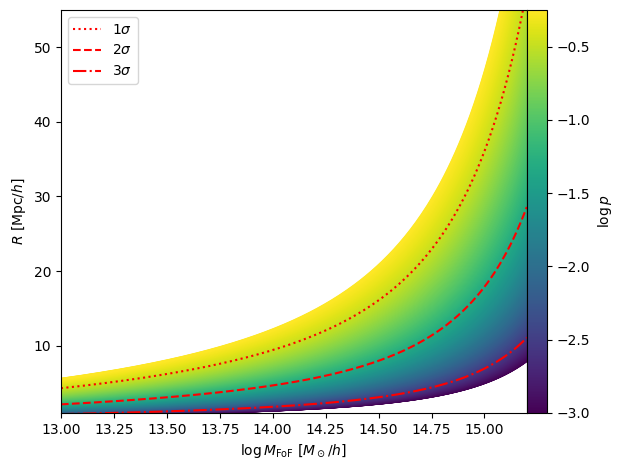

In [78]:
xrange = np.linspace(13, 15.2, 250)
log_p_values = np.linspace(-3, -0.25, 1000)
cmap = cm.viridis
norm = Normalize(vmin=log_p_values.min(), vmax=log_p_values.max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Necessary for the colorbar to use the ScalarMappable


fig, ax = plt.figure(), plt.gca()
for p in log_p_values:
    y = [model.inverse_cdf(10**p, x) for x in xrange]
    ax.plot(xrange, y, color=cmap(norm(p)))

ls = [":", "--", "-."]
for n in range(1, 4):
    p = stats.norm.sf(n) * 2
    y = [model.inverse_cdf(p, x) for x in xrange]
    ax.plot(xrange, y, color="red", label=fr"${n}\sigma$", linestyle=ls[n-1])

ax.set_xlabel(r"$\log M_{\mathrm{FoF}} ~ [M_\odot / h]$")
ax.set_ylabel(r"$R ~ [\mathrm{Mpc} / h]$")
ax.set_ylim(1, 55)
ax.legend()
cbar = fig.colorbar(sm, ax=ax, label=r"$\log p$", pad=0)
ax.set_xlim(xrange.min(), xrange.max())
fig.tight_layout()
fig.savefig("../../plots/matching_probability.png", dpi=450)
fig.show()

## Test matching

In [2]:
simname = "csiborg2_main"
bounds = {"totmass": (1e12, None)}

cats = open_cats(simname, bounds)

Opening catalogues: 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]


In [3]:
model = csiborgtools.match.MatchCatalogues(cats)

100%|██████████| 20/20 [00:04<00:00,  4.32it/s]


In [60]:
cluster = csiborgtools.clusters["Leo"]
x0 = cluster.cartesian_pos(cats[0].boxsize)
logmass0 = np.log10(cluster.mass)
print(logmass0)

14.690196080028514


In [61]:
ps, indxs = model(x0, logmass0, pvalue_threshold=0.05, rmax=30)
print(ps)

Matching catalogues:   0%|          | 0/20 [00:00<?, ?it/s]

Found 2 plausible matches in catalogue 0.
    1: CDF = 1.640e-04, index = 69, logM = 14.423 Msun / h, dx = 1.103 Mpc / h.
    2: CDF = 3.798e-02, index = 1, logM = 15.135 Msun / h, dx = 22.790 Mpc / h.

Found 2 plausible matches in catalogue 1.
    1: CDF = 2.669e-04, index = 58, logM = 14.474 Msun / h, dx = 1.381 Mpc / h.
    2: CDF = 4.125e-02, index = 1, logM = 15.120 Msun / h, dx = 22.606 Mpc / h.

Found 2 plausible matches in catalogue 2.
    1: CDF = 1.993e-04, index = 68, logM = 14.460 Msun / h, dx = 1.232 Mpc / h.
    2: CDF = 3.619e-02, index = 1, logM = 15.145 Msun / h, dx = 22.957 Mpc / h.

Found 2 plausible matches in catalogue 3.
    1: CDF = 1.290e-04, index = 45, logM = 14.545 Msun / h, dx = 1.187 Mpc / h.
    2: CDF = 4.352e-02, index = 2, logM = 15.117 Msun / h, dx = 22.863 Mpc / h.

Found 2 plausible matches in catalogue 4.
    1: CDF = 9.658e-05, index = 47, logM = 14.541 Msun / h, dx = 1.072 Mpc / h.
    2: CDF = 4.109e-02, index = 1, logM = 15.120 Msun / h, dx = 22

Matching catalogues: 100%|██████████| 20/20 [00:00<00:00, 324.46it/s]

{0: 0.0001639847755937618, 1: 0.0002668512052416139, 2: 0.00019926862221641972, 3: 0.00012900322742348536, 4: 9.657721769740224e-05, 5: 0.00011705910455406254, 6: 0.00021073714493358153, 7: 0.00015055517039153088, 8: 0.00032362529099960735, 9: 0.00029247443413660257, 10: 0.0001576842700352632, 11: 0.00023994027660023676, 12: 2.9066704152591605e-05, 13: 6.630406935614896e-05, 14: 3.598720831643476e-05, 15: 2.1723041493393325e-05, 16: 0.00010607153796671209, 17: 0.0006105268685839826, 18: 0.0001620825661784453, 19: 0.00021048883480756508}


In [29]:
# ps_coma = np.array(list(ps.values()))
# ps_centaurus = np.array(list(ps.values()))
# ps_shapley = np.array(list(ps.values()))
ps_virgo = np.array(list(ps.values()))



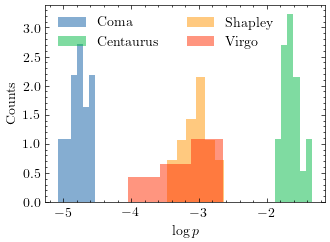

In [57]:
ps = {"Coma": ps_coma, "Centaurus": ps_centaurus, "Shapley": ps_shapley, "Virgo": ps_virgo}

with plt.style.context('science'):
    plt.figure()
    for name, p in ps.items():
        plt.hist(np.log10(p), bins="auto", label=name, density=True, alpha=0.5)

    plt.legend(loc="upper left", ncol=2)
    plt.xlabel(r"$\log p$")
    plt.ylabel("Counts")
    plt.tight_layout()
    plt.savefig("../../plots/matching_probability_histogram.png", dpi=450, bbox_inches="tight")
    plt.show()

In [6]:
dx = np.asarray([np.linalg.norm(cats[i]["cartesian_pos"][indx] - x0) for i, indx in indxs.items()])
logM = np.asarray([np.log10(cats[i]["totmass"][indx]) for i, indx in indxs.items()])

In [7]:
ps

{0: 1.4193360633019125e-05,
 1: 1.5814267730451803e-05,
 2: 1.578598264362352e-05,
 3: 2.9062728345241595e-05,
 4: 2.329484601226728e-05,
 5: 2.9712920921687314e-05,
 6: 2.075305503379532e-05,
 7: 1.074050678318006e-05,
 8: 1.888041209263669e-05,
 9: 1.9893007069504698e-05,
 10: 1.7657580479335522e-05,
 11: 2.8592305873931245e-05,
 12: 1.878843367530969e-05,
 13: 8.355070255428032e-06,
 14: 1.413250003556854e-05,
 15: 1.4124073620669364e-05,
 16: 1.2492311356582242e-05,
 17: 2.5997234836760974e-05,
 18: 1.3209139431147321e-05,
 19: 1.0199631684804089e-05}

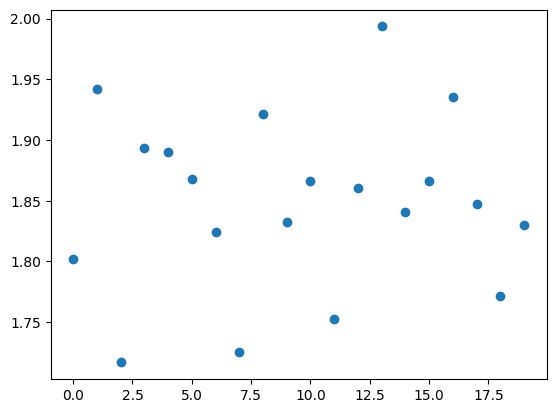

In [114]:
plt.figure()
plt.scatter(np.arange(len(dx)), dx)
plt.show()

In [98]:
ps, dlog, indxs = model.cdf_per_halo(x0, logmass0)
r = np.linalg.norm(pos - x0.reshape(1, -1), axis=1)

In [99]:
p, k = model.match_halo(x0, logmass0, pvalue_threshold=0.1, max_absdlogmass=1)
print(p, k, logmass[k])

None None [[15.430657 15.189978 15.118925 ... 12.098506 12.76248  12.336433]]


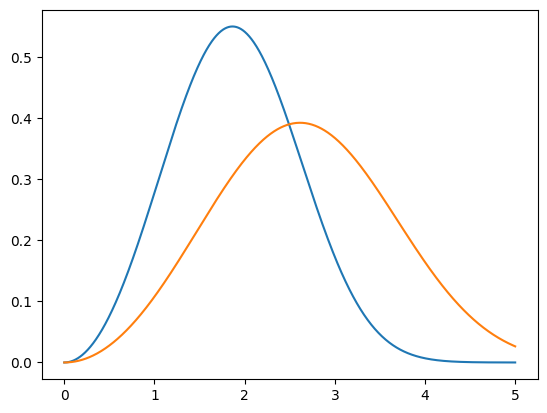

In [111]:
plt.figure()
plt.plot(xrange, y)
plt.plot(xrange, y2)
plt.show()

In [71]:
x, y = model.pdf_marginalized(xrange, 14.0, 42.5, 4)